In [1]:
%pwd

'd:\\DATA SCIENCE\\youtube_sentiment_analysis'

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/DATA SCIENCE/reddit.csv', encoding='latin-1')


In [4]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [5]:
df['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [6]:
df.shape

(37249, 2)

In [7]:
df.sample().values

array([[' this related india ', 0]], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [9]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [10]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [11]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [12]:
df= df.dropna()

In [13]:
df.duplicated().sum()

np.int64(350)

In [14]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [17]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [18]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [20]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()



In [21]:
# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [22]:
# Updated regex pattern to match http, https, and www links
url_pattern = r'(http[s]?://|www\.)[^\s]+'

# Identify comments containing URLs
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7288\883784477.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]


,clean_comment,category


In [23]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [24]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

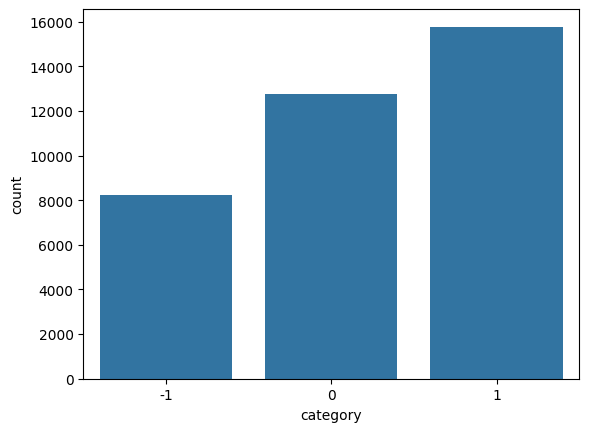

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [26]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [27]:
df["word_counts"] = df['clean_comment'].apply(lambda x: len(x.split()))

In [28]:
df.head()

,clean_comment,category,word_counts
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [29]:
df['word_counts'].describe()

count    36793.000000
mean        29.673090
std         56.793091
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_counts, dtype: float64

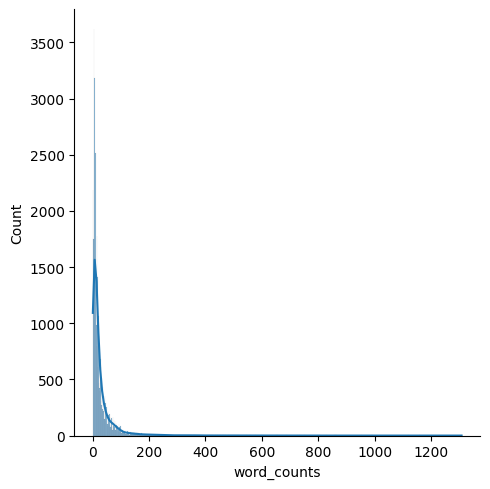

In [30]:
sns.displot(df['word_counts'], kde=True)

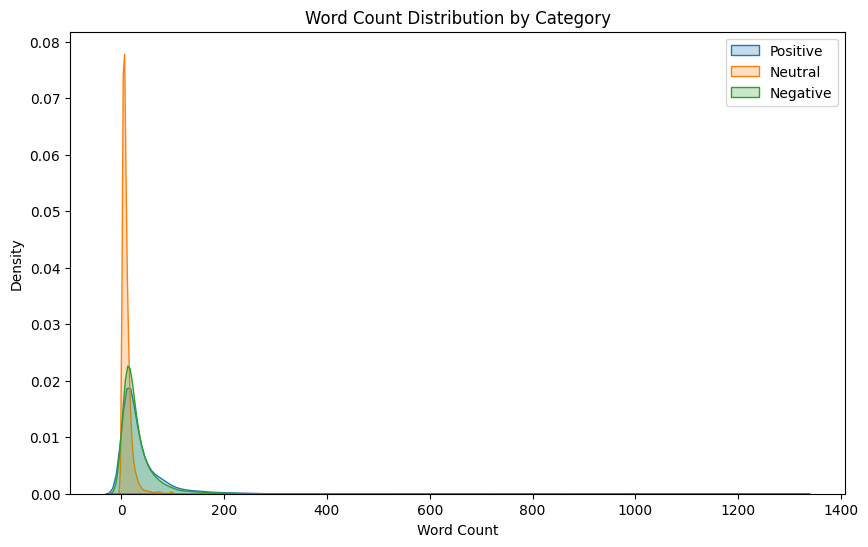

In [31]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_counts'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_counts'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_counts'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_counts'>

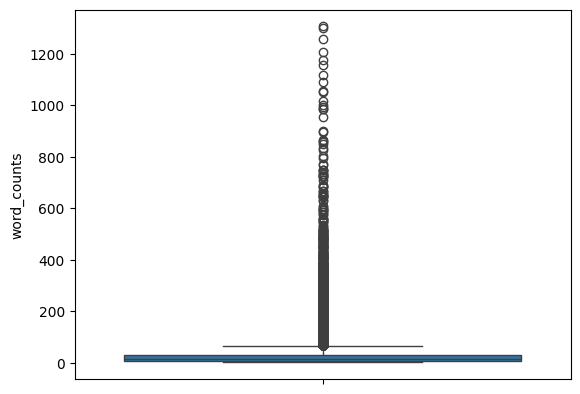

In [35]:
sns.boxplot(df['word_counts'])

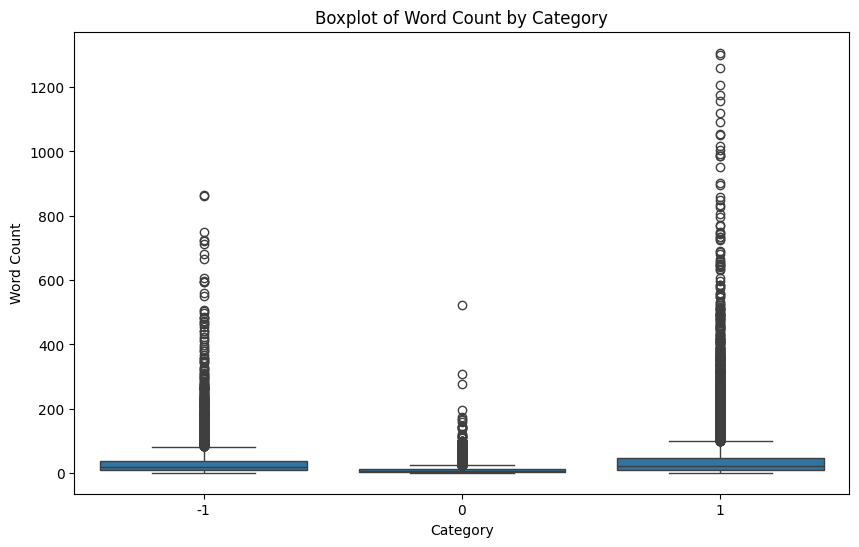

In [37]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_counts')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

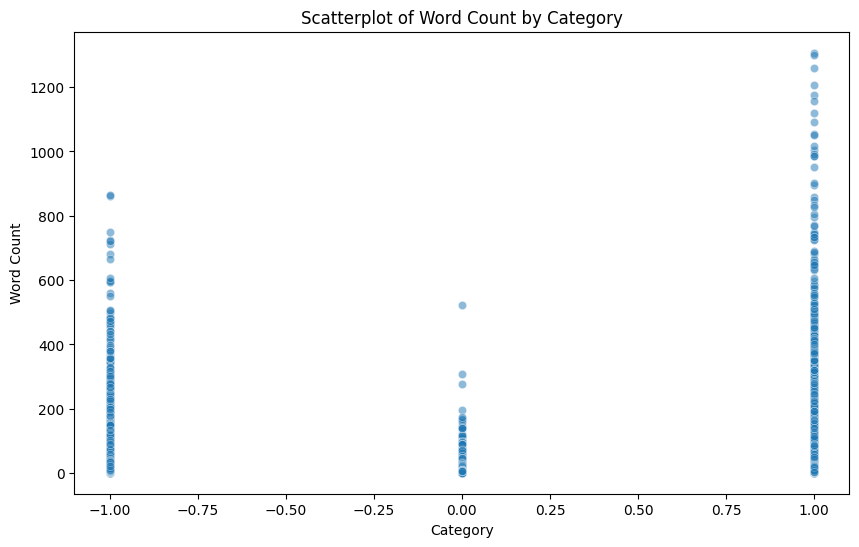

In [38]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_counts', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_counts'>

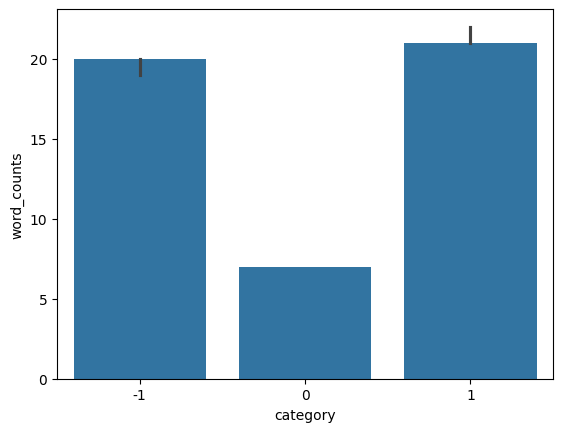

In [40]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_counts',estimator='median')

In [42]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [43]:
df.sample(5)

,clean_comment,category,word_counts,num_stop_words
10578,the hindi heartland the demon being praised ya...,1,75,33
4802,manmohan never started,0,3,0
23107,iska time aagaya hai delhi agra jaane,0,7,0
12654,you would call pro secular pro dalit oppressed...,1,140,47
30807,error you cannot fast travel when police are n...,1,9,3


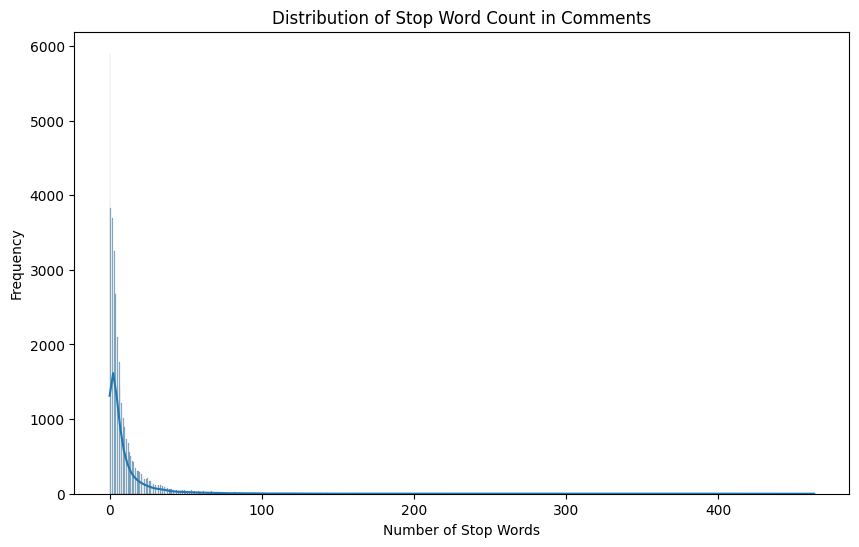

In [44]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

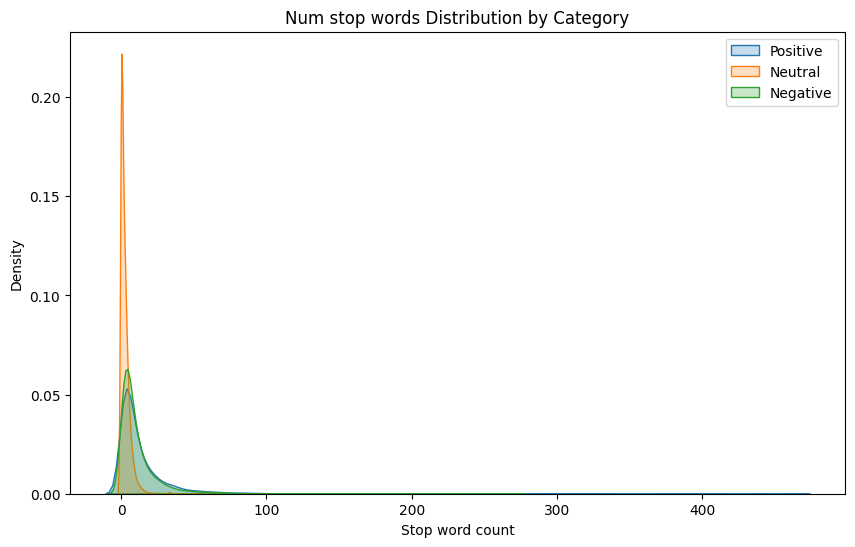

In [45]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7288\101498387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


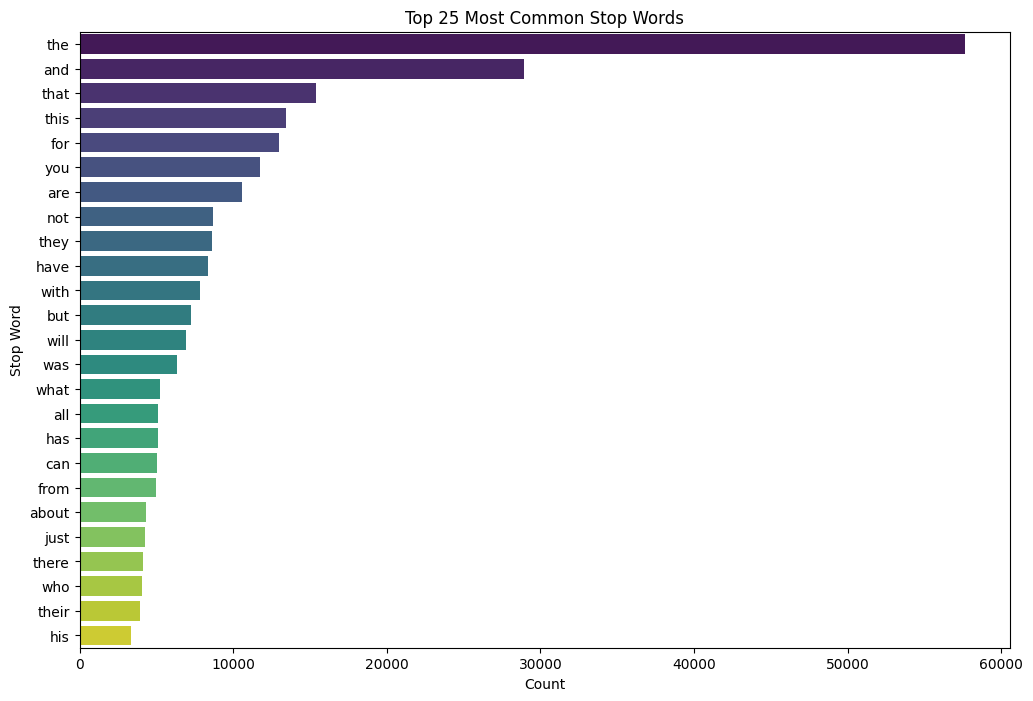

In [46]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [47]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_counts,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [48]:
df['num_chars'].describe()

count    36793.000000
mean       182.654581
std        361.568977
min          1.000000
25%         38.000000
50%         80.000000
75%        185.000000
max       8664.000000
Name: num_chars, dtype: float64

In [49]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [50]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'n', 'o', 's', 'r', 'h', 'l', 'd', 'u',
       'c', 'm', 'p', 'g', 'y', 'w', 'b', 'f', 'v', 'k', 'j', 'x', '0',
       'z', 'q', 'â', '\x80', 'à', '1', '2', '\x99', '¤', '¥', '9', '5',
       '3', 'å', '4', '6', '7', 'ä', '8', '¾', 'ã', '\x9c', '\x8d',
       '\x9d', '\x82', '\x81', '\x87', '¸', 'æ', '¿', '\\', '\x8b',
       '\x97', '\x98', 'µ', 'ç', '´', 'è', 'ï', '@', '¡', '¯', '\x88',
       '³', 'é', '¹', '\xa0', '¼', '\x8f', 'º', '\x85', '\x8c', '°',
       '\x84', '\x94', '±', '\x93', '²', '\x9a', '«', '¦', '®', '¨',
       '\x86', '\x95', '\x83', '½', '\x89', 'ª', '§', '\x91', '»', '\x9f',
       '¬', 'ê', '¢', '\x8e', 'ù', '\x9b', '©', 'ø', '\x90', '£', '\x8a',
       '\xad', '·', '\x92', '\x96', '¶', '\x9e', 'í', 'û', 'ð', 'ì', 'ú',
       'ö', 'ñ', 'ë', 'á', '\t', 'ó', '×'], dtype=object)

In [51]:
char_frequency_df.tail(50)

,character,frequency
66,°,262
49,,249
92,,247
57,±,222
88,,206
81,²,203
114,,193
36,«,190
45,¦,188
82,®,182
